In [624]:
import sys
import os
import numpy as np

# add the project root to the Python path to allow for absolute imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
	sys.path.append(project_root)

from mlfromsc.algorithms.logistic_regression import LogisticRegression

In [ ]:
# used AI for this
def make_demo_classification(n_samples=200, seed=42):
    """Create a simple 2D classification dataset with two classes."""
    rng= np.random.default_rng(seed)
    half = n_samples // 2

    # class1
    mean0 = [-2.0, -2.0]
    cov = [[1.0, 0.2], [0.2, 1.0]]
    X0 = rng.multivariate_normal(mean0, cov, half)
    y0 = np.zeros(half)

    # class2
    mean1 = [+2.0, +2.0]
    X1 = rng.multivariate_normal(mean1, cov, half)
    y1 = np.ones(half)

    X = np.vstack((X0, X1))
    y = np.hstack((y0, y1))
    return X, y


In [ ]:
# this gives us two clusters in 2D space
# we will train a logistic regression model on this data

X, y = make_demo_classification()
print("X shape:", X.shape)
print("y positives:", y.sum())
print(X[:5], y[:5])


X shape: (200, 2)
y positives: 100.0
[[-1.57828913 -2.89377654]
 [-3.17616235 -1.98643164]
 [ 0.33483599 -1.31230527]
 [-1.89901537 -2.29903413]
 [-1.44747353 -2.52649823]] [0. 0. 0. 0. 0.]


In [627]:
from mlfromsc.utils import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y)


In [628]:
model = LogisticRegression(X_tr, y_tr)
model.use_loss_history(True)
model.fit(learning_rate=0.05, epochs=100)

print("Train‑Accuracy:", model.accuracy(X_tr, y_tr))
print("Test‑Accuracy :", model.accuracy(X_te, y_te))


Epoch 1/100, Loss: 0.4804530139182014
Epoch 2/100, Loss: 0.36291268589182357
Epoch 3/100, Loss: 0.2814841939239837
Epoch 4/100, Loss: 0.22386538801099432
Epoch 5/100, Loss: 0.182108840061478
Epoch 6/100, Loss: 0.1511122412062545
Epoch 7/100, Loss: 0.1275736381022427
Epoch 8/100, Loss: 0.10932181396194642
Epoch 9/100, Loss: 0.09490060418113704
Epoch 10/100, Loss: 0.08331267835469436
Epoch 11/100, Loss: 0.07386057962229578
Epoch 12/100, Loss: 0.06604673965813876
Epoch 13/100, Loss: 0.05950949503859516
Epoch 14/100, Loss: 0.053981371879175184
Epoch 15/100, Loss: 0.049261371638754485
Epoch 16/100, Loss: 0.04519621734454606
Epoch 17/100, Loss: 0.041667438200890604
Epoch 18/100, Loss: 0.03858232598399124
Epoch 19/100, Loss: 0.035867502987009914
Epoch 20/100, Loss: 0.03346428014826674
Epoch 21/100, Loss: 0.03132526119438393
Epoch 22/100, Loss: 0.029411826587599117
Epoch 23/100, Loss: 0.027692247131991348
Epoch 24/100, Loss: 0.026140253950578254
Epoch 25/100, Loss: 0.024733943182064767
Epoch 2

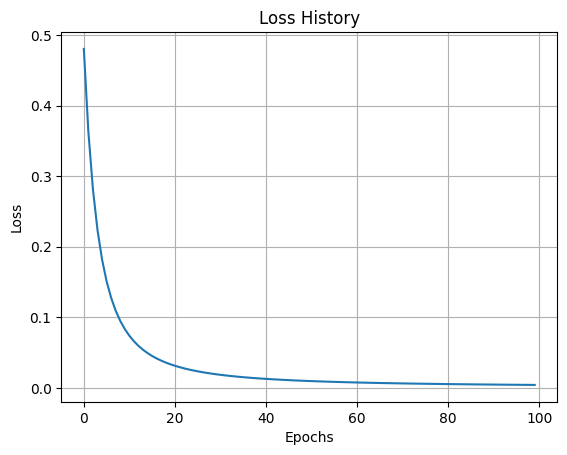

In [629]:
model.loss_history

import matplotlib.pyplot as plt
plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss History")
plt.grid()
plt.show()

In [630]:
model.predict([0, -1])

np.int64(0)

Theta1: 0.8951685623742478
Theta2: 0.9377914856619787


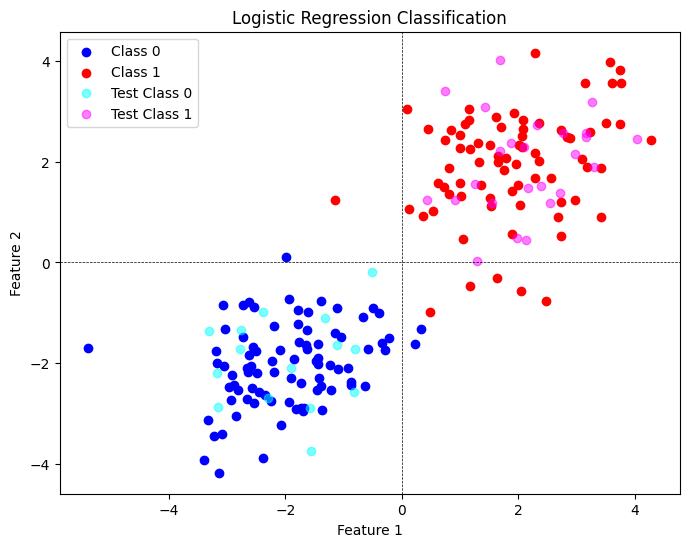

In [631]:
theta1, theta2 = model.coefficients
print("Theta1:", theta1)
print("Theta2:", theta2)

plt.figure(figsize=(8, 6))
plt.scatter(X_tr[y_tr == 0][:, 0], X_tr[y_tr == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_tr[y_tr == 1][:, 0], X_tr[y_tr == 1][:, 1], color='red', label='Class 1')
plt.scatter(X_te[y_te == 0][:, 0], X_te[y_te == 0][:, 1], color='cyan', label='Test Class 0', alpha=0.5)
plt.scatter(X_te[y_te == 1][:, 0], X_te[y_te == 1][:, 1], color='magenta', label='Test Class 1', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Classification')
plt.legend()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

## Titanic Datase
A very widespread problem is to determine whether a passenger survived the Titanic disaster or not.
Hence Logistic Regressions task is to decide a binary problem, lets test it here.

In [632]:
import pandas as pd
data = pd.read_csv("/Users/maximilianverwiebe/Downloads/train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
age_mean = np.nanmean(data["Age"].values)
data["Age"].fillna(age_mean, inplace=True)
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

X_numerical = data[["Pclass", "Age", "Fare", "FamilySize"]].values
y = data["Survived"].values

# one hot encoding for categorical features
X_categorical = pd.get_dummies(data[["Sex", "Embarked"]]).values

# combine numerical and categorical features
X = np.hstack((X_numerical, X_categorical))


X

/var/folders/0d/y9xg9gkj7y1ffmn0_g8_k68w0000gn/T/ipykernel_14632/2666239888.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(age_mean, inplace=True)


array([[ 3.        , 22.        ,  7.25      , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        , 71.2833    , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  7.925     , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        , 29.69911765, 23.45      , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        , 30.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 32.        ,  7.75      , ...,  0.        ,
         1.        ,  0.        ]], shape=(891, 9))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [635]:
model2 = LogisticRegression(X_tr, y_tr)
model2.use_loss_history(True)
model2.fit(learning_rate=0.001, epochs=1000)

Epoch 1/1000, Loss: 0.4804530139182014
Epoch 2/1000, Loss: 0.4529003535490434
Epoch 3/1000, Loss: 0.4344494639791528
Epoch 4/1000, Loss: 0.42172749784200386
Epoch 5/1000, Loss: 0.4127547135866554
Epoch 6/1000, Loss: 0.4062928937205382
Epoch 7/1000, Loss: 0.40155324827042704
Epoch 8/1000, Loss: 0.3980210206157551
Epoch 9/1000, Loss: 0.3953518721532713
Epoch 10/1000, Loss: 0.39331009044733534
Epoch 11/1000, Loss: 0.3917309575173125
Epoch 12/1000, Loss: 0.39049725736868424
Epoch 13/1000, Loss: 0.38952424135050967
Epoch 14/1000, Loss: 0.3887497785703001
Epoch 15/1000, Loss: 0.38812776334702676
Epoch 16/1000, Loss: 0.38762361614393515
Epoch 17/1000, Loss: 0.3872111589472151
Epoch 18/1000, Loss: 0.38687041070943257
Epoch 19/1000, Loss: 0.3865860096961513
Epoch 20/1000, Loss: 0.3863460699346286
Epoch 21/1000, Loss: 0.38614134271265205
Epoch 22/1000, Loss: 0.385964595334599
Epoch 23/1000, Loss: 0.38581014651223733
Epoch 24/1000, Loss: 0.38567351595034755
Epoch 25/1000, Loss: 0.3855511580377867

In [636]:
acc_tr = model2.accuracy(X_te, y_te)
acc_tr

np.float64(0.6629213483146067)

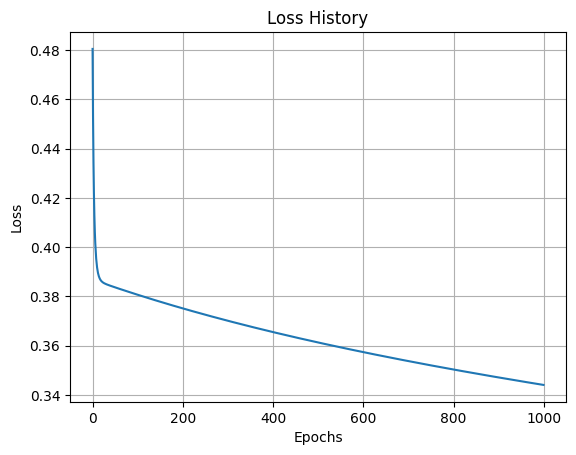

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model2.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss History")
plt.grid()
plt.show()

Coefficients: [-0.08963335 -0.02042952  0.01452084 -0.05755451  0.10406186 -0.11028428
  0.01183994  0.00465666 -0.02419079]


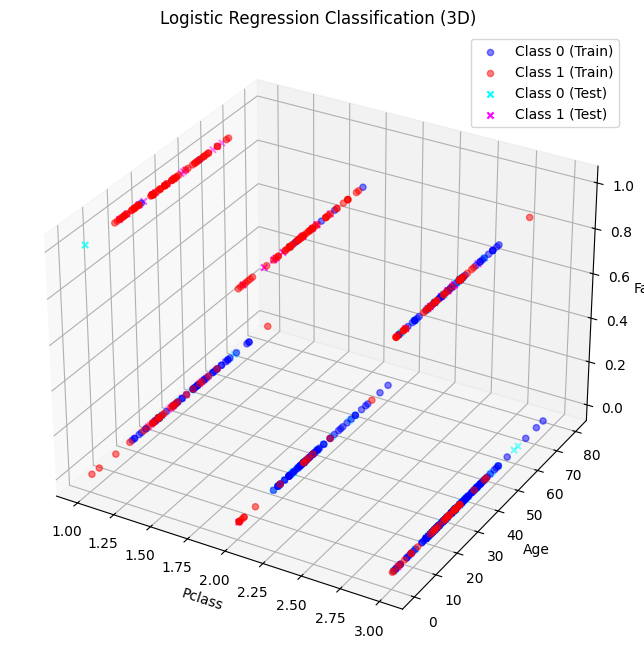

In [ ]:
# just so see smth
from mpl_toolkits.mplot3d import Axes3D

print("Coefficients:", model2.coefficients)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_tr[y_tr == 0][:, 0], X_tr[y_tr == 0][:, 1], X_tr[y_tr == 0][:, 4], color="blue", label="Class 0 (Train)", alpha=0.5)
ax.scatter(X_tr[y_tr == 1][:, 0], X_tr[y_tr == 1][:, 1], X_tr[y_tr == 1][:, 4], color="red", label="Class 1 (Train)", alpha=0.5)

ax.scatter(X_te[y_te == 0][:, 0], X_te[y_te == 0][:, 1], X_te[y_te == 0][:, 4], color="cyan", label="Class 0 (Test)", marker="x")
ax.scatter(X_te[y_te == 1][:, 0], X_te[y_te == 1][:, 1], X_te[y_te == 1][:, 4], color="magenta", label="Class 1 (Test)", marker="x")

ax.set_xlabel("Pclass")
ax.set_ylabel("Age")
ax.set_zlabel("Fare")
ax.set_title("Logistic Regression Classification (3D)")
ax.legend()

plt.show()

In [642]:
# Pclass, Age, Fare, FamilySize, SexMale, SexFemale, EmbarkedC, EmbarkedQ, EmbarkedS
model2.predict([1, 22, 0, 0, 1, 0, 0, 0, 1])

# 0 = not survived, 1 = survived

np.int64(0)